In [1]:
import pandas as pd

project_path = '/home/wjunneng/Ubuntu/2019-CCF-Prediction-Of-The-Quality-Compliance-Rate-Of-Workpieces-In-Discrete-Manufacturing-Processes'

first_round_testing_data_path = project_path + '/data/original/first_round_testing_data.csv'
first_round_training_data_path = project_path + '/data/original/first_round_training_data.csv'

first_round_testing_data = pd.read_csv(first_round_testing_data_path)
first_round_training_data = pd.read_csv(first_round_training_data_path)

select_columns = ['Parameter1', 'Parameter10', 'Parameter2', 'Parameter3',
       'Parameter4', 'Parameter5', 'Parameter6', 'Parameter7', 'Parameter8',
       'Parameter9']

first_round_testing_data = first_round_testing_data[select_columns]
first_round_training_data = first_round_training_data[select_columns]




In [2]:
first_round_testing_data.describe()




,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
count,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03
mean,1.072897e+05,26.514627,369.101132,1.132272e+03,2.196607e+07,5.019799,5.404172,210.884571,59.810770,8.764239e+04
std,2.980241e+06,84.807106,6352.033456,3.220140e+04,1.429351e+09,6.782677,6.788654,1616.938611,1545.270888,3.885921e+06
min,1.331475e-09,0.001024,0.000001,5.436324e-08,4.859234e-10,0.000003,0.000005,0.000624,0.023699,3.962831e-04
25%,2.233015e-02,0.101478,0.090422,6.985572e-02,1.867368e-02,0.827784,0.563965,0.152059,0.035407,5.930812e-01
50%,8.489791e-01,0.727611,1.000019,8.985648e-01,1.002728e+00,2.772987,2.684398,0.600827,2.931083,5.930812e-01
75%,3.103161e+01,10.060093,12.159195,1.300345e+01,5.193707e+01,6.680183,7.117767,2.374035,17.850021,6.783967e+00
max,1.758842e+08,517.197610,317368.685606,2.183219e+06,1.101618e+11,83.671947,41.175410,35698.591553,66984.723637,1.738083e+08


In [3]:
first_round_training_data.describe()



,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
count,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03
mean,485.198954,35.902066,1.952379e+03,406.348529,189.205842,5.868163e+00,5.598597e+00,272.300821,22.133231,5.823664e+04
std,11401.971393,101.629348,5.419588e+04,12018.898941,2621.779049,8.631865e+00,7.686898e+00,2027.460514,302.172768,3.173068e+06
min,0.000003,0.001024,1.683797e-07,0.000005,0.000002,9.985942e-07,9.810610e-07,0.000624,0.023699,3.962831e-04
25%,0.088221,0.101478,4.765771e-02,0.102304,0.118314,7.416296e-01,3.818154e-01,0.152059,0.035407,5.930812e-01
50%,1.050304,0.727611,9.405962e-01,1.044908,1.068467,2.225808e+00,2.684398e+00,0.600827,2.931083,5.930812e-01
75%,10.938565,13.969790,1.569199e+01,10.665397,9.902064,6.680183e+00,7.117767e+00,2.374035,17.850021,6.783967e+00
max,713682.207601,517.197610,3.034568e+06,864530.632179,139767.494732,8.367195e+01,4.117541e+01,35698.591553,20086.397753,1.738083e+08


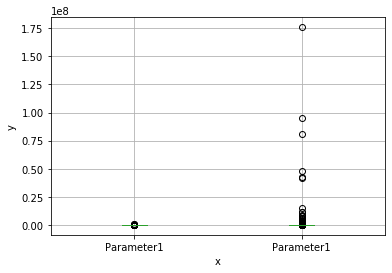

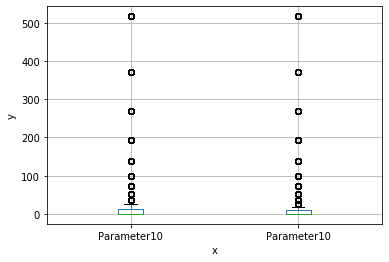

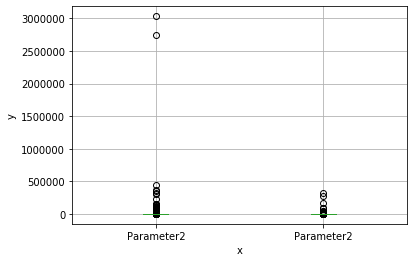

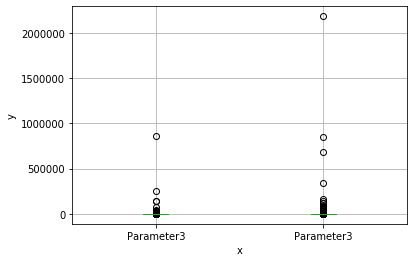

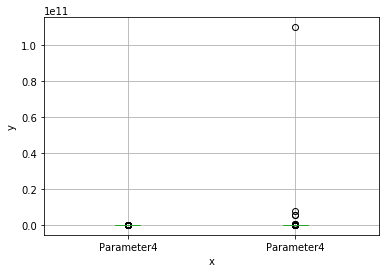

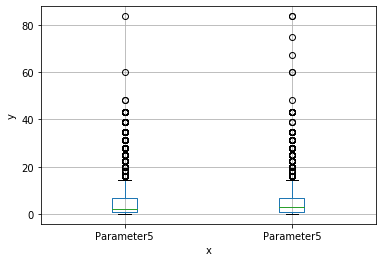

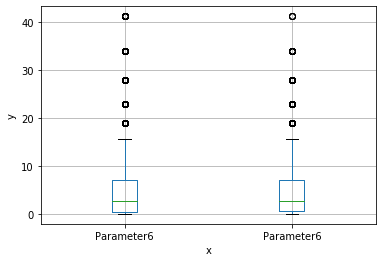

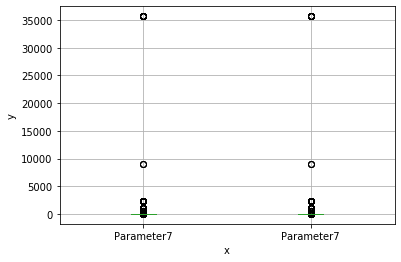

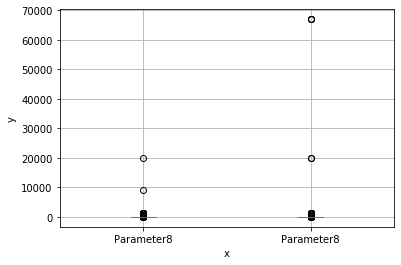

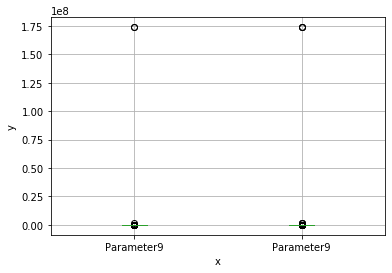

In [4]:
%matplotlib inline

def draw(df, fd, **params):
    """
    绘制箱形图
    :param df: 
    :param params: 
    :return: 
    """
    import matplotlib.pyplot as plt 

    for column in df.columns:    
        tmp = pd.concat([df[column], fd[column]], axis=1)
        tmp.boxplot()#这里，pandas自己有处理的过程，很方便哦。
        plt.ylabel("y")
        plt.xlabel("x")#我们设置横纵坐标的标题。
        plt.show()

draw(first_round_training_data, first_round_testing_data)



In [9]:
def deal_outlier(df, **params):
    """
    处理异常值
    :param df: 
    :param params: 
    :return: 
    """
    Q1 = df.describe().ix['25%', :].sort_index()
    Q3 = df.describe().ix['75%', :].sort_index()
    
    Q1_dict = Q1.to_dict()
    Q3_dict = Q3.to_dict()
    
    min = (Q3 - 3*(Q3 - Q1)).to_dict()
    max = (Q3 + 3*(Q3 - Q1)).to_dict()
    
    for column in ['Parameter1', 'Parameter10', 'Parameter2', 'Parameter3', 'Parameter4', 'Parameter5', 'Parameter6', 'Parameter7', 'Parameter8',
                    'Parameter9']:
        df[column] = df[column].apply(lambda x: Q3_dict[column] if x >= max[column]  else x)
        df[column] = df[column].apply(lambda x: Q1_dict[column] if x <= min[column]  else x)
    
    return df

tmp = deal_outlier(first_round_training_data)

import numpy as np
print(len(np.where(np.isnan(tmp))[0]))




Parameter1     10.938565
Parameter10    13.969790
Parameter2     15.691995
Parameter3     10.665397
Parameter4      9.902064
Parameter5      6.680183
Parameter6      7.117767
Parameter7      2.374035
Parameter8     17.850021
Parameter9      6.783967
Name: 75%, dtype: float64 Parameter1     0.088221
Parameter10    0.101478
Parameter2     0.047658
Parameter3     0.102304
Parameter4     0.118314
Parameter5     0.741630
Parameter6     0.381815
Parameter7     0.152059
Parameter8     0.035407
Parameter9     0.593081
Name: 25%, dtype: float64
{'Parameter1': 43.48959982262755, 'Parameter10': 55.574726418793496, 'Parameter2': 62.62500508438828, 'Parameter3': 42.354675547889826, 'Parameter4': 39.25331155243566, 'Parameter5': 24.495843847228496, 'Parameter6': 27.325620093010393, 'Parameter7': 9.039962681466127, 'Parameter8': 71.2938640822241, 'Parameter9': 25.356623828991058} {'Parameter1': -21.612468967875678, 'Parameter10': -27.63514626204954, 'Parameter2': -31.24101597697297, 'Parameter3': -21

/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/home/wjunneng/Python/anaconda3/envs/lightgbm/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
